# Modelling

* In this notebook we will build a model and make predictions to our target column(Global_active_power). 
* Our goal is to get a high number of accuracy (>96%) and another good result in the evaluation metrics.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data preprocessing

In [2]:
df_ec = pd.read_csv('electric_consumption.csv', low_memory=False)
df_ec

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...
2049275,2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2049276,2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2049277,2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2049278,2010-11-26 21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [3]:
df_ec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Global_active_power    float64
 2   Global_reactive_power  float64
 3   Voltage                float64
 4   Global_intensity       float64
 5   Sub_metering_1         float64
 6   Sub_metering_2         float64
 7   Sub_metering_3         float64
dtypes: float64(7), object(1)
memory usage: 125.1+ MB


In [4]:
df_ec['Date'] = pd.to_datetime(df_ec['Date'], infer_datetime_format=True)
cols = ['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3']
df_ec[cols] = df_ec[cols].apply(pd.to_numeric).astype('float32')
df_ec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Global_active_power    float32       
 2   Global_reactive_power  float32       
 3   Voltage                float32       
 4   Global_intensity       float32       
 5   Sub_metering_1         float32       
 6   Sub_metering_2         float32       
 7   Sub_metering_3         float32       
dtypes: datetime64[ns](1), float32(7)
memory usage: 70.4 MB


In [5]:
df_ec.isna().sum()

Date                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

Our dataset is too big, i think we can reduce number of data with calculate average of all features every 10 min....

In [6]:
new_df = df_ec.groupby(pd.Grouper(key='Date', freq='10min')).mean()
new_df.reset_index(inplace=True)
new_df

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:20:00,4.587333,0.4840,234.366669,19.700001,0.0,1.333333,16.833334
1,2006-12-16 17:30:00,4.252200,0.4608,234.208008,18.280001,0.0,1.100000,16.799999
2,2006-12-16 17:40:00,4.721600,0.0308,234.845001,20.260000,0.0,0.000000,16.900000
3,2006-12-16 17:50:00,3.476200,0.0424,235.044998,14.800000,0.0,0.000000,16.900000
4,2006-12-16 18:00:00,4.690400,0.1526,234.975006,20.080000,0.0,23.600000,16.900000
...,...,...,...,...,...,...,...,...
207522,2010-11-26 20:20:00,1.053600,0.1074,240.001007,4.460000,0.0,1.200000,0.000000
207523,2010-11-26 20:30:00,0.975400,0.0196,238.591995,4.100000,0.0,1.200000,0.000000
207524,2010-11-26 20:40:00,0.958400,0.0614,238.938995,4.020000,0.0,1.100000,0.000000
207525,2010-11-26 20:50:00,0.978200,0.0234,239.393997,4.120000,0.0,0.200000,0.000000


In [7]:
new_df.isna().sum()

Date                        0
Global_active_power      2577
Global_reactive_power    2577
Voltage                  2577
Global_intensity         2577
Sub_metering_1           2577
Sub_metering_2           2577
Sub_metering_3           2577
dtype: int64

In [8]:
new_df[new_df.isna().any(axis=1)]

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
19051,2007-04-28 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19052,2007-04-28 00:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19053,2007-04-28 00:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19054,2007-04-28 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19055,2007-04-28 01:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
199014,2010-09-28 18:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199015,2010-09-28 18:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199016,2010-09-28 18:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199017,2010-09-28 18:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
new_df.dropna(inplace=True)
new_df.reset_index(inplace=True, drop=True)
new_df

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:20:00,4.587333,0.4840,234.366669,19.700001,0.0,1.333333,16.833334
1,2006-12-16 17:30:00,4.252200,0.4608,234.208008,18.280001,0.0,1.100000,16.799999
2,2006-12-16 17:40:00,4.721600,0.0308,234.845001,20.260000,0.0,0.000000,16.900000
3,2006-12-16 17:50:00,3.476200,0.0424,235.044998,14.800000,0.0,0.000000,16.900000
4,2006-12-16 18:00:00,4.690400,0.1526,234.975006,20.080000,0.0,23.600000,16.900000
...,...,...,...,...,...,...,...,...
204945,2010-11-26 20:20:00,1.053600,0.1074,240.001007,4.460000,0.0,1.200000,0.000000
204946,2010-11-26 20:30:00,0.975400,0.0196,238.591995,4.100000,0.0,1.200000,0.000000
204947,2010-11-26 20:40:00,0.958400,0.0614,238.938995,4.020000,0.0,1.100000,0.000000
204948,2010-11-26 20:50:00,0.978200,0.0234,239.393997,4.120000,0.0,0.200000,0.000000


In [10]:
new_df['Year'] = new_df.Date.dt.year
new_df['Month'] = new_df.Date.dt.month
new_df['Day'] = new_df.Date.dt.day
new_df['Hour'] = new_df.Date.dt.hour
new_df['Minute'] = new_df.Date.dt.minute
new_df['Weekday'] = new_df.Date.dt.weekday
cols2 = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Weekday']
new_df[cols2] = new_df[cols2].apply(pd.to_numeric).astype('int32')
del new_df['Date']
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204950 entries, 0 to 204949
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Global_active_power    204950 non-null  float32
 1   Global_reactive_power  204950 non-null  float32
 2   Voltage                204950 non-null  float32
 3   Global_intensity       204950 non-null  float32
 4   Sub_metering_1         204950 non-null  float32
 5   Sub_metering_2         204950 non-null  float32
 6   Sub_metering_3         204950 non-null  float32
 7   Year                   204950 non-null  int32  
 8   Month                  204950 non-null  int32  
 9   Day                    204950 non-null  int32  
 10  Hour                   204950 non-null  int32  
 11  Minute                 204950 non-null  int32  
 12  Weekday                204950 non-null  int32  
dtypes: float32(7), int32(6)
memory usage: 10.2 MB


In [11]:
new_df.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Year                     0
Month                    0
Day                      0
Hour                     0
Minute                   0
Weekday                  0
dtype: int64

In [12]:
new_df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute,Weekday
0,4.587333,0.4840,234.366669,19.700001,0.0,1.333333,16.833334,2006,12,16,17,20,5
1,4.252200,0.4608,234.208008,18.280001,0.0,1.100000,16.799999,2006,12,16,17,30,5
2,4.721600,0.0308,234.845001,20.260000,0.0,0.000000,16.900000,2006,12,16,17,40,5
3,3.476200,0.0424,235.044998,14.800000,0.0,0.000000,16.900000,2006,12,16,17,50,5
4,4.690400,0.1526,234.975006,20.080000,0.0,23.600000,16.900000,2006,12,16,18,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204945,1.053600,0.1074,240.001007,4.460000,0.0,1.200000,0.000000,2010,11,26,20,20,4
204946,0.975400,0.0196,238.591995,4.100000,0.0,1.200000,0.000000,2010,11,26,20,30,4
204947,0.958400,0.0614,238.938995,4.020000,0.0,1.100000,0.000000,2010,11,26,20,40,4
204948,0.978200,0.0234,239.393997,4.120000,0.0,0.200000,0.000000,2010,11,26,20,50,4


## Split data into train, validation and test sets

Before we build machine learning model we need to split our dataset into 3 sets (training, validation and test). First, we split data into features and target column so we can make prediction on the test set. Second, we split our data into train, validation and test using `train_test_split()`.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
features = new_df.drop('Global_active_power', axis=1)
target = new_df['Global_active_power']

X, X_test, y, y_test = train_test_split(features, target, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((122970, 12), (40990, 12), (40990, 12), (122970,), (40990,), (40990,))

In [15]:
X_train

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute,Weekday
144268,0.0382,241.283005,0.80,0.0,0.0,0.7,2009,9,19,6,40,5
130004,0.1020,239.177002,8.78,0.0,0.0,21.4,2009,6,9,7,30,1
133853,0.1270,237.147995,9.84,0.0,0.0,23.4,2009,7,8,8,0,2
30922,0.0420,237.701996,0.74,0.0,0.0,0.0,2007,7,22,3,10,6
41843,0.0672,242.046005,1.34,0.0,0.0,0.0,2007,10,5,23,30,4
...,...,...,...,...,...,...,...,...,...,...,...,...
176673,0.0236,230.531006,19.18,29.5,0.0,16.9,2010,5,5,21,0,2
97763,0.1796,240.766998,1.62,0.0,0.0,0.0,2008,10,28,8,10,1
80754,0.2412,239.845001,1.60,0.0,1.3,0.7,2008,7,2,4,40,2
30170,0.1366,233.451004,2.40,0.0,1.2,0.0,2007,7,16,21,50,0


In [16]:
X_val

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute,Weekday
105671,0.0000,241.503998,2.000000,0.0,0.0,0.000000,2008,12,22,7,10,0
8242,0.1550,243.132004,6.200000,0.0,0.0,18.100000,2007,2,11,23,0,6
741,0.2194,235.455994,9.860000,0.0,1.2,17.000000,2006,12,21,20,50,3
84370,0.0160,239.057007,0.720000,0.0,0.0,0.700000,2008,7,27,7,20,6
126057,0.1422,237.705994,6.160000,0.0,0.1,0.700000,2009,5,12,21,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...
51812,0.0000,243.910004,5.400000,0.0,0.0,18.299999,2007,12,14,5,0,4
54397,0.0094,241.382996,11.860001,0.0,0.1,17.900000,2008,1,1,3,50,1
36757,0.0542,242.737000,0.680000,0.0,0.0,0.000000,2007,8,31,15,50,4
107397,0.1754,245.199997,1.620000,0.0,0.0,0.000000,2009,1,3,6,50,5


In [17]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

models = {
    "Elastic Net": ElasticNet(),
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor()
}

# make function for fit and score model
def fit_score(models, X_train, X_val, y_train, y_val):
    """
    Fits and evaluate ML models.
    """
    model_scores = {}
    for name, model in models.items():
        np.random.seed(42)
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_val, y_val)
    return model_scores

In [18]:
model_result = fit_score(models, X_train, X_val, y_train, y_val)
model_result

{'Elastic Net': 0.9777489396959687,
 'Ridge': 0.9992671090409948,
 'Random Forest': 0.9995573275900586}

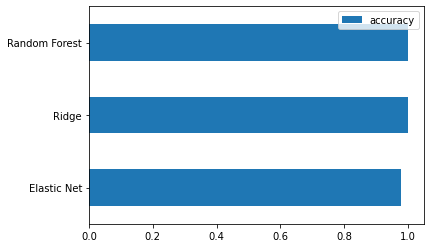

In [19]:
model_compare = pd.DataFrame(model_result, index=['accuracy'])
model_compare.T.plot.barh();

It seems that all of our model perform very well in validation set.

Now let's just focus on `Elastic_Net()` for hyperparameter tuning and evaluation , so we can know how well our model perform on test set and see the evaluation metrics.

### Elastic Net hyperparameter tuning and evaluation

In [20]:
from sklearn.model_selection import RandomizedSearchCV

hyper_params_EN = {
    "normalize": [True, False],
    "alpha": [0.01, 0.1,1,10,100,1000],
    "l1_ratio" : [0.25,0.5,0.75,1],
    "selection": ['cyclic', 'random']
}

rs_EN = RandomizedSearchCV(ElasticNet(), param_distributions=hyper_params_EN, cv=5, n_iter=20, verbose=True, random_state=42)
rs_EN.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=ElasticNet(), n_iter=20,
                   param_distributions={'alpha': [0.01, 0.1, 1, 10, 100, 1000],
                                        'l1_ratio': [0.25, 0.5, 0.75, 1],
                                        'normalize': [True, False],
                                        'selection': ['cyclic', 'random']},
                   random_state=42, verbose=True)

In [21]:
rs_EN.best_params_

{'selection': 'cyclic', 'normalize': False, 'l1_ratio': 0.75, 'alpha': 0.01}

In [22]:
RS_EN = ElasticNet(random_state=42, **rs_EN.best_params_)
RS_EN.fit(X_train, y_train)

ElasticNet(alpha=0.01, l1_ratio=0.75, random_state=42)

In [23]:
RS_EN.score(X_val, y_val), RS_EN.score(X_test, y_test)

(0.9989270950107958, 0.9989584693211148)

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score


def evaluate_test(model):
    test_preds = model.predict(X_test)
    test_scores = {
        "Mean Squared Error": mean_squared_error(y_test, test_preds),
        "Root Mean Squared Error": np.sqrt(mean_squared_error(y_test, test_preds)),
        "Mean Absolute Error": mean_absolute_error(y_test, test_preds),
        "R2 Score": r2_score(y_test, test_preds),
        "Explained Variance Score": explained_variance_score(y_test, test_preds)
    }
    return test_scores

In [25]:
EN_eval = evaluate_test(RS_EN)
EN_eval

{'Mean Squared Error': 0.0010764940311335715,
 'Root Mean Squared Error': 0.032809968471999046,
 'Mean Absolute Error': 0.023355450807714253,
 'R2 Score': 0.9989584693211148,
 'Explained Variance Score': 0.9989584707226812}

In [26]:
test_preds = RS_EN.predict(X_test)
EN_compare = pd.DataFrame(data={
    "Actual values": y_test,
    "Predict values": test_preds
})
EN_compare['differences'] = EN_compare['Predict values'] - EN_compare['Actual values']
EN_compare

,Actual values,Predict values,differences
45364,0.2054,0.174950,-0.030450
122159,1.7440,1.708116,-0.035884
129421,0.3150,0.331230,0.016230
106707,0.3476,0.362188,0.014588
5913,0.9318,0.904459,-0.027341
...,...,...,...
34222,0.1710,0.165121,-0.005879
163529,0.2938,0.288076,-0.005724
144072,1.7384,1.717837,-0.020563
161804,0.3264,0.319790,-0.006610


**Conclusion**:

* Based on the evaluation metrics and comparation between actual values and predicted values, we can see that our model perform very well to make number prediction on the target column.
